In [1]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

df = pd.read_csv("/Users/yenalee/Desktop/workplace/AI_2025-1/week5/car_evaluation.csv")
df

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc
...,...,...,...,...,...,...,...
1722,low,low,5more,more,med,med,good
1723,low,low,5more,more,med,high,vgood
1724,low,low,5more,more,big,low,unacc
1725,low,low,5more,more,big,med,good


In [3]:
df = pd.DataFrame(df)

# 컬럼명 지정
df.columns = ["buying", "maint", "doors", "persons", "lug_boot", "safety", "output"]

df

,buying,maint,doors,persons,lug_boot,safety,output
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc
...,...,...,...,...,...,...,...
1722,low,low,5more,more,med,med,good
1723,low,low,5more,more,med,high,vgood
1724,low,low,5more,more,big,low,unacc
1725,low,low,5more,more,big,med,good


In [4]:
df.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
output      0
dtype: int64

In [5]:
df['output'].value_counts()

output
unacc    1209
acc       384
good       69
vgood      65
Name: count, dtype: int64

In [6]:
columns = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety','output']

In [7]:
x = df.drop('output', axis=1)
y = df['output'].values

In [8]:
y = pd.get_dummies(y)

In [9]:
x = pd.get_dummies(x)

In [10]:
x

,buying_high,buying_low,buying_med,buying_vhigh,maint_high,maint_low,maint_med,maint_vhigh,doors_2,doors_3,...,doors_5more,persons_2,persons_4,persons_more,lug_boot_big,lug_boot_med,lug_boot_small,safety_high,safety_low,safety_med
0,False,False,False,True,False,False,False,True,True,False,...,False,True,False,False,False,False,True,False,False,True
1,False,False,False,True,False,False,False,True,True,False,...,False,True,False,False,False,False,True,True,False,False
2,False,False,False,True,False,False,False,True,True,False,...,False,True,False,False,False,True,False,False,True,False
3,False,False,False,True,False,False,False,True,True,False,...,False,True,False,False,False,True,False,False,False,True
4,False,False,False,True,False,False,False,True,True,False,...,False,True,False,False,False,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1722,False,True,False,False,False,True,False,False,False,False,...,True,False,False,True,False,True,False,False,False,True
1723,False,True,False,False,False,True,False,False,False,False,...,True,False,False,True,False,True,False,True,False,False
1724,False,True,False,False,False,True,False,False,False,False,...,True,False,False,True,True,False,False,False,True,False
1725,False,True,False,False,False,True,False,False,False,False,...,True,False,False,True,True,False,False,False,False,True


In [11]:
y

,acc,good,unacc,vgood
0,False,False,True,False
1,False,False,True,False
2,False,False,True,False
3,False,False,True,False
4,False,False,True,False
...,...,...,...,...
1722,False,True,False,False
1723,False,False,False,True
1724,False,False,True,False
1725,False,True,False,False


In [12]:
# 데이터 표준화
scaler = StandardScaler()
x = scaler.fit_transform(x)

# 트레인 / 테스트 분리
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [13]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1381, 21), (346, 21), (1381, 4), (346, 4))

In [14]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam

model = Sequential()

model.add(Dense(30,input_shape=(21,),activation='relu'))
model.add(Dense(15, activation='relu'))
model.add(Dense(4, activation='softmax'))
model.compile(Adam(learning_rate=0.04),'categorical_crossentropy',metrics=['accuracy'])
model.summary()

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 30)             │           660 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 15)             │           465 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │            64 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,189 (4.64 KB)

 Trainable params: 1,189 (4.64 KB)

 Non-trainable params: 0 (0.00 B)

In [15]:
model_history=model.fit(x=x_train, y=y_train, epochs=30, batch_size=32,validation_split=0.2) # validation_data= (X_test,y_test)
y_pred = model.predict(x_test)

y_test_class = np.argmax(y_test, axis=1)
y_pred_class = np.argmax(y_pred, axis=1)

Epoch 1/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6789 - loss: 0.7176 - val_accuracy: 0.8700 - val_loss: 0.3050
Epoch 2/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 708us/step - accuracy: 0.8844 - loss: 0.2552 - val_accuracy: 0.9350 - val_loss: 0.1529
Epoch 3/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 706us/step - accuracy: 0.9393 - loss: 0.1322 - val_accuracy: 0.9242 - val_loss: 0.1865
Epoch 4/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 716us/step - accuracy: 0.9672 - loss: 0.0847 - val_accuracy: 0.9819 - val_loss: 0.0894
Epoch 5/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 741us/step - accuracy: 0.9704 - loss: 0.0875 - val_accuracy: 0.9675 - val_loss: 0.0859
Epoch 6/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 731us/step - accuracy: 0.9593 - loss: 0.1049 - val_accuracy: 0.9242 - val_loss: 0.1734
Epoch 7/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 739us/step - accuracy: 0.9426 - loss: 0.1271 - val_accuracy: 0.9675 - val_loss: 0.0734
Epoch 8/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 741us/step - accuracy: 0.9877 - loss: 0.0360 - val_accuracy: 0.99

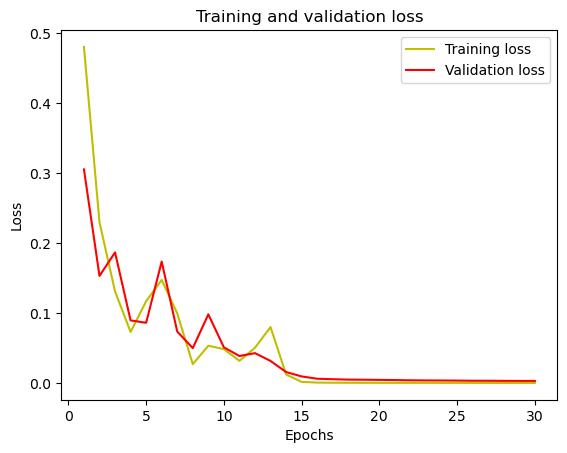

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

loss =model_history.history['loss']
val_loss =model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

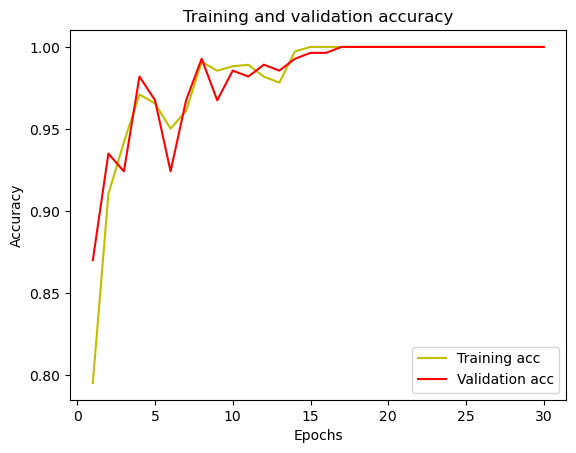

In [17]:
acc =model_history.history['accuracy']
val_acc =model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [18]:
#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99        77
           1       1.00      0.93      0.96        14
           2       1.00      1.00      1.00       239
           3       1.00      1.00      1.00        16

    accuracy                           1.00       346
   macro avg       1.00      0.98      0.99       346
weighted avg       1.00      1.00      1.00       346

[[ 77   0   0   0]
 [  1  13   0   0]
 [  0   0 239   0]
 [  0   0   0  16]]
